In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2


# AVERAGING PIXELS (BLURRING IMAGE)

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


C:\Users\smart\AppData\Local\Temp\ipykernel_10536\1731086068.py:47: RuntimeWarning: divide by zero encountered in log10
  normalized_data=(255/np.log10(256)) * np.log10(1+data3).astype(np.uint8)
C:\Users\smart\AppData\Local\Temp\ipykernel_10536\1731086068.py:53: RuntimeWarning: divide by zero encountered in log10
  normalized_data=(255/np.log10(256)) * np.log10(1+data3).astype(np.uint8)


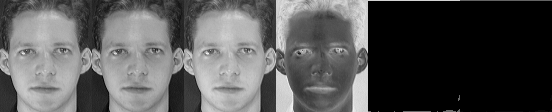

In [76]:
def filters(image_name,save=True,blur=False,darken=False,ligthen=False,negative=False,general_log_transform=False,inverse_log_transform=False):


    image=Image.open(image_name)
    filtered_imgs=[image]
    print("Original Image")
    data=np.array(image)

    if blur:
      temp=np.zeros((data.shape[0],data.shape[1]))
      i=0
      flag=0
      while  not flag:
         for j in range(data.shape[1]-3):

             arr=np.array([
             [data[i,j],data[i,j+1],data[i,j+2]],
             [data[i+1,j],data[i+1,j+1],data[i+1,j+2]],
             [data[i+2,j],data[i+2,j+1],data[i+2,j+2]]
             ])

             temp[i+1,j+1]=arr.mean()

         if i==data.shape[0]-4:
             flag=1
         i=i+1
      blurred = Image.fromarray(temp).convert("L")     #convert to grayscale
      filtered_imgs.append(blurred)
      print("Blurred Image")

    if darken:
        dark = Image.fromarray(data-10).convert("L")
        filtered_imgs.append(dark)
        print("Darken Image")

    if ligthen:
        light = Image.fromarray(data+10).convert("L")
        filtered_imgs.append(light)
        print("Lighten Image")

    if negative:
        neg= Image.fromarray(255-data).convert("L")
        filtered_imgs.append(neg)
        print("Negative Image")

    if general_log_transform:
        normalized_data=(255/np.log10(256)) * np.log10(1+data3).astype(np.uint8)
        gen = Image.fromarray(  normalized_data     ).convert("L")
        filtered_imgs.append(gen)
        print("Log Image")

    if inverse_log_transform:
        normalized_data=(255/np.log10(256)) * np.log10(1+data3).astype(np.uint8)
        inv = Image.fromarray(np.power(10,normalized_data*(np.log10(256)/255))-1).convert("L")
        filtered_imgs.append(inv)
        print("Inv Log Image")

    dst = Image.new('L', (image.width *len(filtered_imgs), image.height))

    for i in range(len(filtered_imgs)):
        dst.paste(filtered_imgs[i], (i*image.width, 0))

    if save:
        dst.save("filtered pics/filtered_"+image_name.split("\\")[1])

    display(dst)

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


C:\Users\smart\AppData\Local\Temp\ipykernel_10536\1731086068.py:47: RuntimeWarning: divide by zero encountered in log10
  normalized_data=(255/np.log10(256)) * np.log10(1+data3).astype(np.uint8)
C:\Users\smart\AppData\Local\Temp\ipykernel_10536\1731086068.py:53: RuntimeWarning: divide by zero encountered in log10
  normalized_data=(255/np.log10(256)) * np.log10(1+data3).astype(np.uint8)


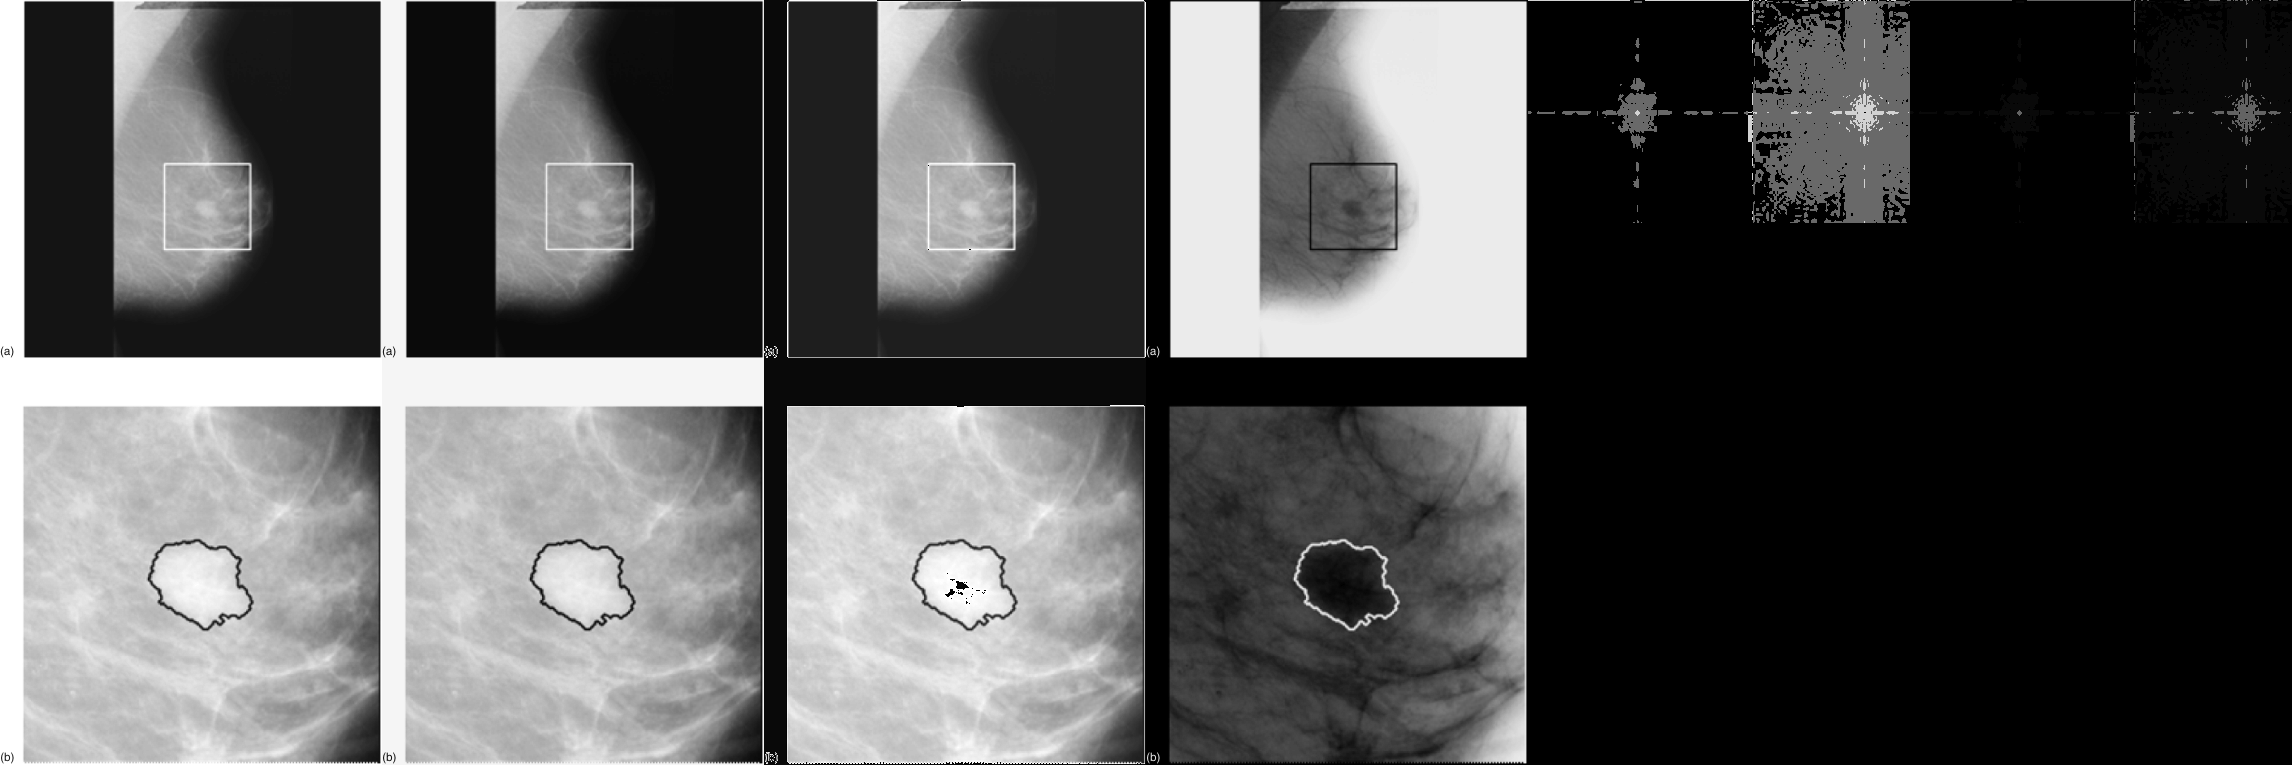

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


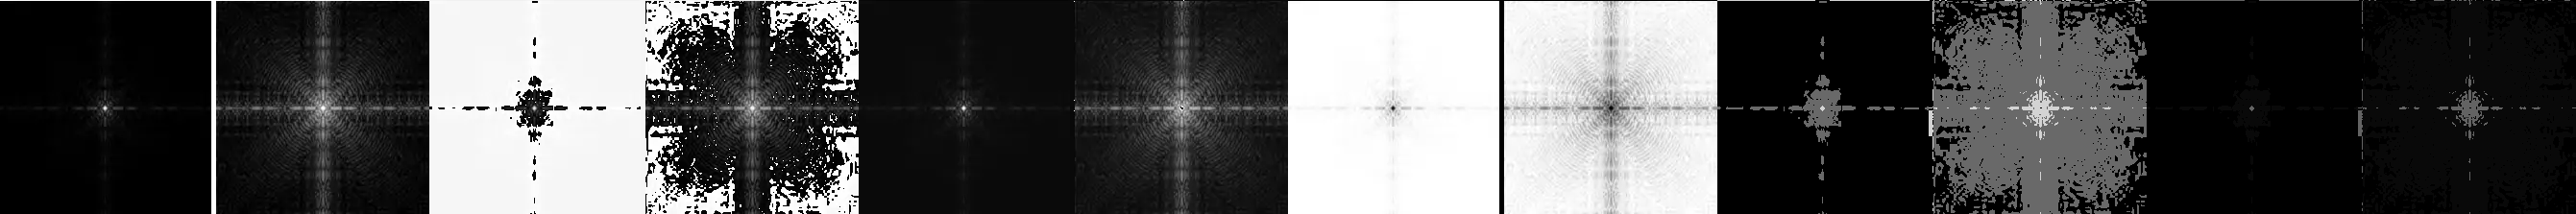

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


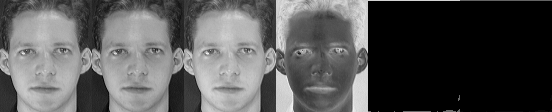

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


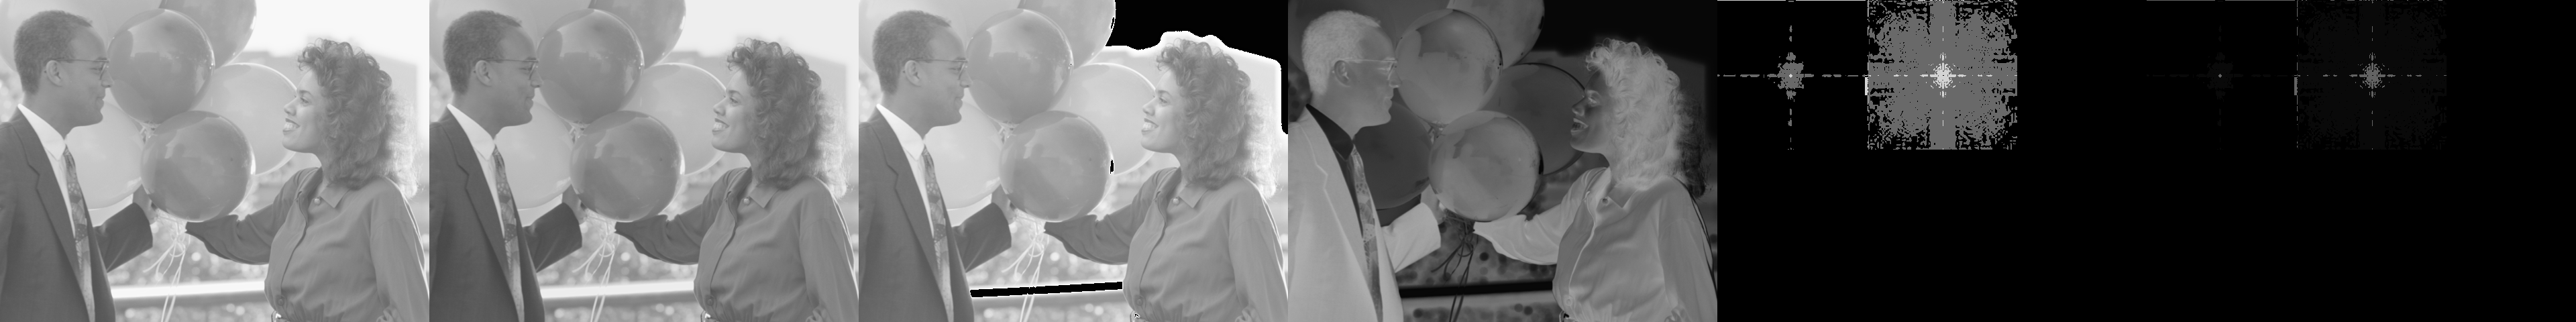

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


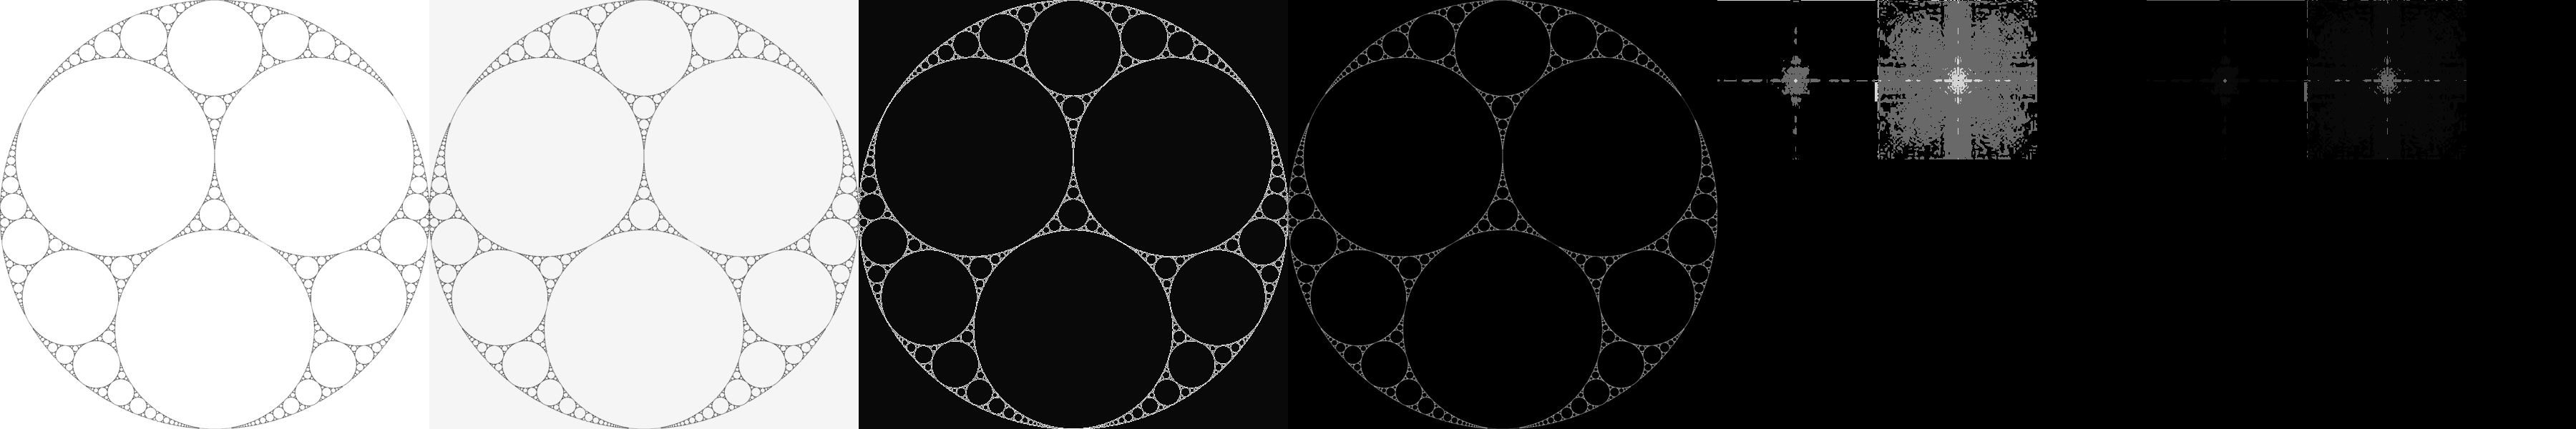

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


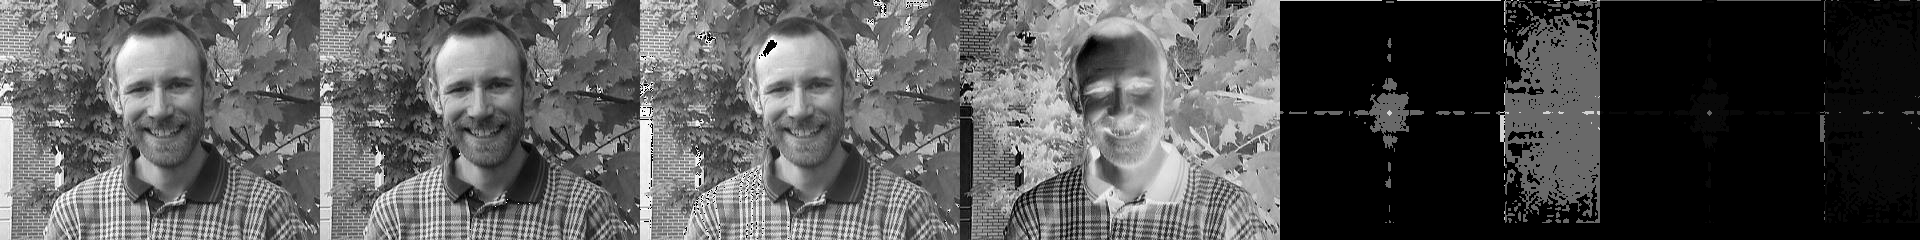

Original Image
Darken Image
Lighten Image
Negative Image
Log Image
Inv Log Image


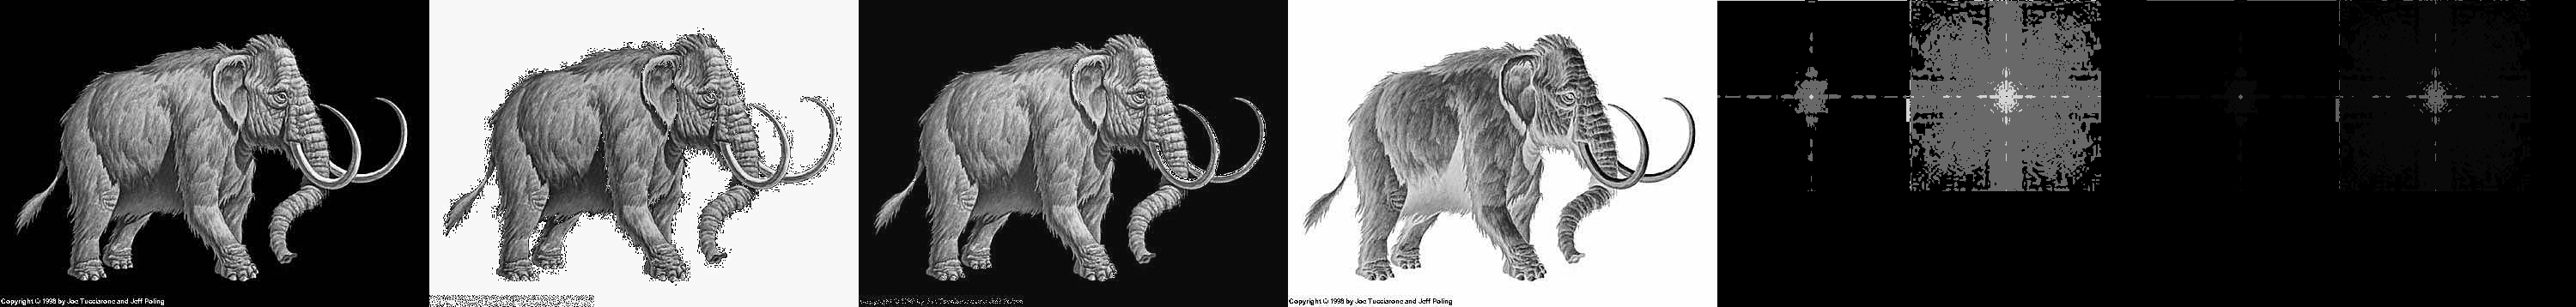

In [77]:
pics_names=[]
directory = 'pics'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        pics_names.append(f)

for pic in pics_names:
    filters(pic,save=False,darken=True,ligthen=True,negative=True,general_log_transform=True,inverse_log_transform=True)